### 智能供应链分析
* 数据集：SupplyChainDataset.csv

### To Do：
* 供应链数据探索
* 对用户进行分层运营
* 对于欺诈订单进行预测，即Order Status='SUSPECTED_FRAUD'
* 对于迟交货订单进行预测，即Delivery Status= 'Late delivery'
* 对于销售额进行预测，即Sales字段
* 对于订货数量进行预测，即Order Item Quantity


In [1]:
import pandas as pd
dataset = pd.read_csv('./SupplyChain.csv',encoding='unicode_escape')

In [2]:
dataset


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


* 查看空值

In [3]:
# dataset.shape
null_num= dataset.isnull().sum()
null_num[null_num>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [5]:
dataset.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [8]:
dataset['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

* 由以上看交货延迟即Late delivery 占了过大半

In [9]:
dataset['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

* 由以上看订单欺诈即SUSPECTED_FRAUD占得不多，约36分之一

* 对客户Customer Lname和Fname合并

In [10]:
dataset[['Customer Fname','Customer Lname']]

,Customer Fname,Customer Lname
0,Cally,Holloway
1,Irene,Luna
2,Gillian,Maldonado
3,Tana,Tate
4,Orli,Hendricks
...,...,...
180514,Maria,Peterson
180515,Ronald,Clark
180516,John,Smith
180517,Mary,Smith


In [11]:
dataset['Customer Full name'] = dataset['Customer Lname']+dataset['Customer Fname']
dataset['Customer Full name']

0            HollowayCally
1                LunaIrene
2         MaldonadoGillian
3                 TateTana
4            HendricksOrli
                ...       
180514       PetersonMaria
180515         ClarkRonald
180516           SmithJohn
180517           SmithMary
180518        OrtegaAndrea
Name: Customer Full name, Length: 180519, dtype: object

* 查看客户所在邮编

In [12]:
dataset['Customer Zipcode'].value_counts()
# dataset['Customer Zipcode'].isnull().sum()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [13]:
dataset['Customer Zipcode'].fillna(0,inplace = True)
dataset['Customer Zipcode'].isnull().sum()
dataset.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

### 可视化

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


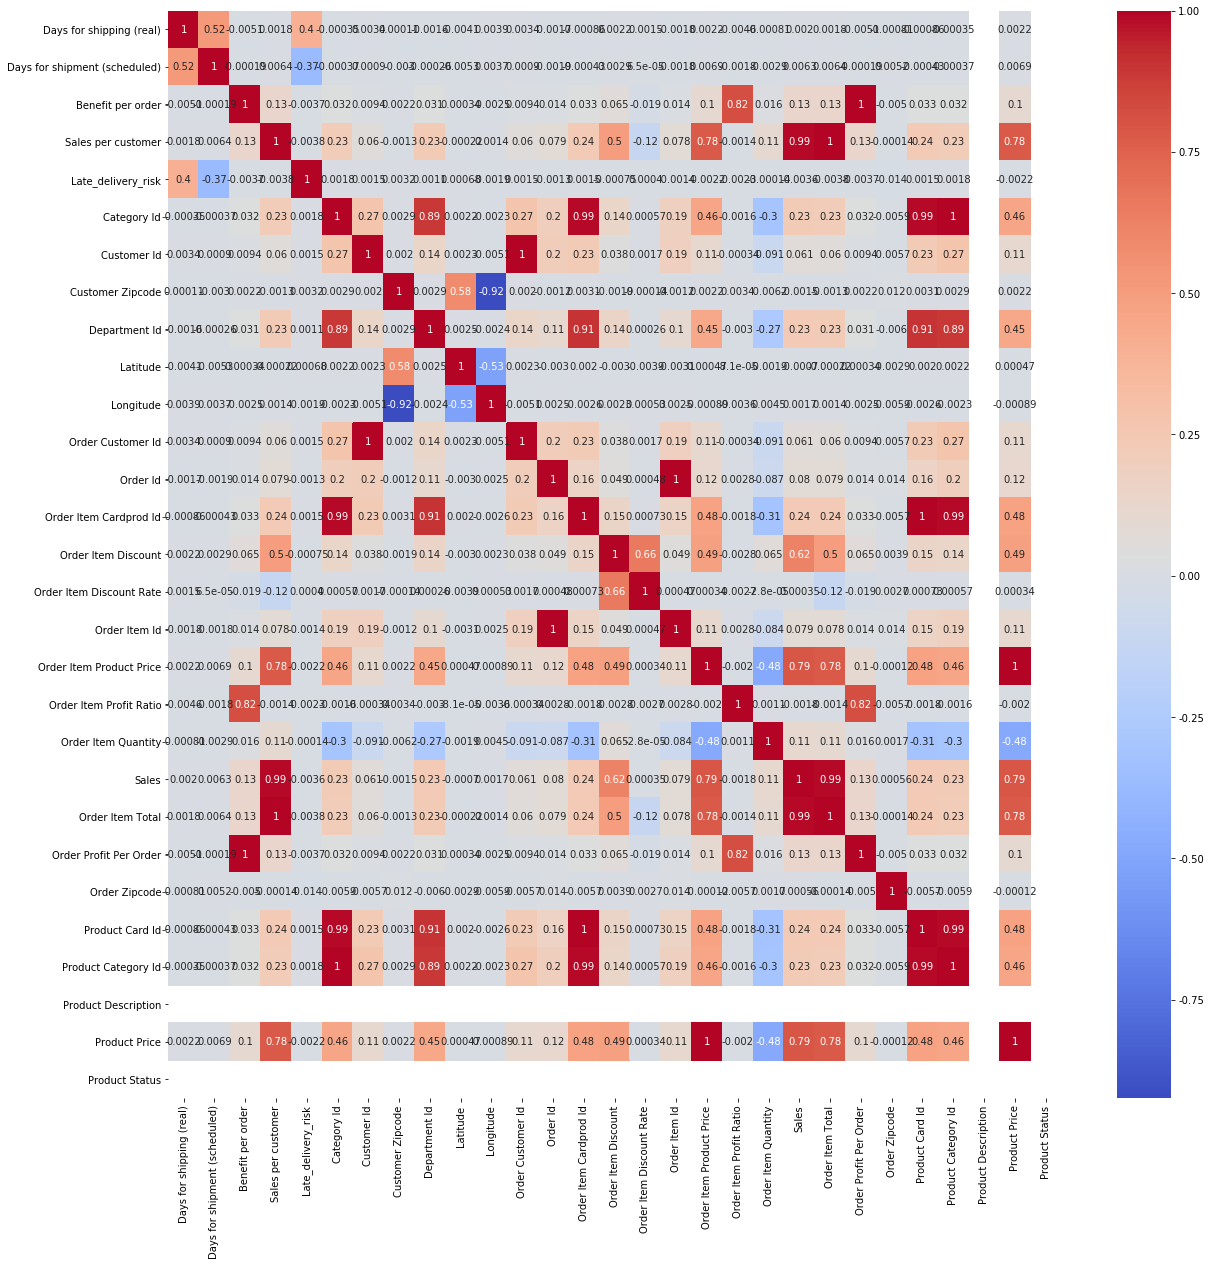

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
data = dataset
plt.figure(figsize=(20,20))# 展示尺寸
# annot=True 显示具体数字
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

* 按Market、Order Region聚类

In [15]:
market= data.groupby('Market')
# market['Sales per customer'].sum().sort_values(ascending=False)

In [16]:
region= data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False)

Order Region
Western Europe     5.296003e+06
Central America    5.093850e+06
South America      2.660244e+06
Northern Europe    1.939362e+06
Southern Europe    1.837526e+06
Oceania            1.809997e+06
Southeast Asia     1.738553e+06
Caribbean          1.481669e+06
West of USA        1.412254e+06
South Asia         1.397365e+06
Eastern Asia       1.334313e+06
East of USA        1.231955e+06
West Asia          1.056081e+06
US Center          1.034129e+06
South of  USA      7.069043e+05
Eastern Europe     6.963072e+05
West Africa        6.541680e+05
North Africa       5.722420e+05
East Africa        3.380543e+05
Central Africa     2.929126e+05
Southern Africa    2.043025e+05
Canada             1.682574e+05
Central Asia       9.795369e+04
Name: Sales per customer, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


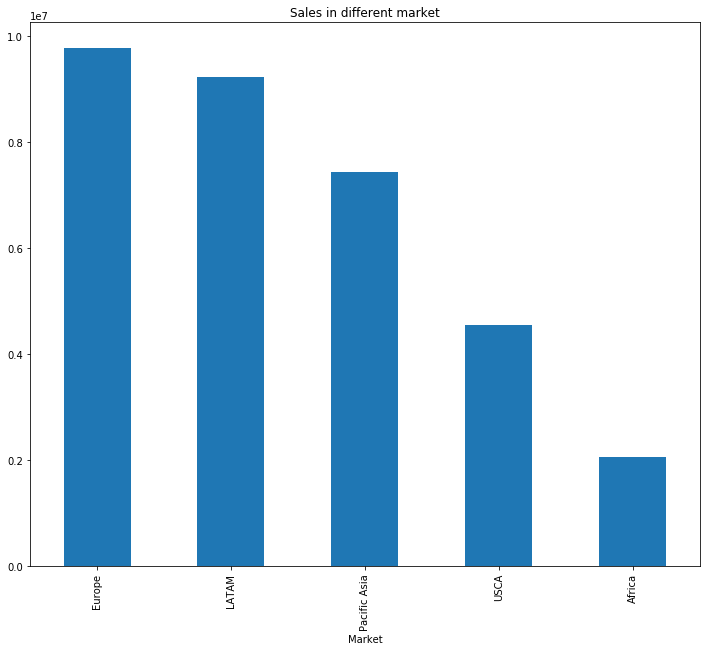

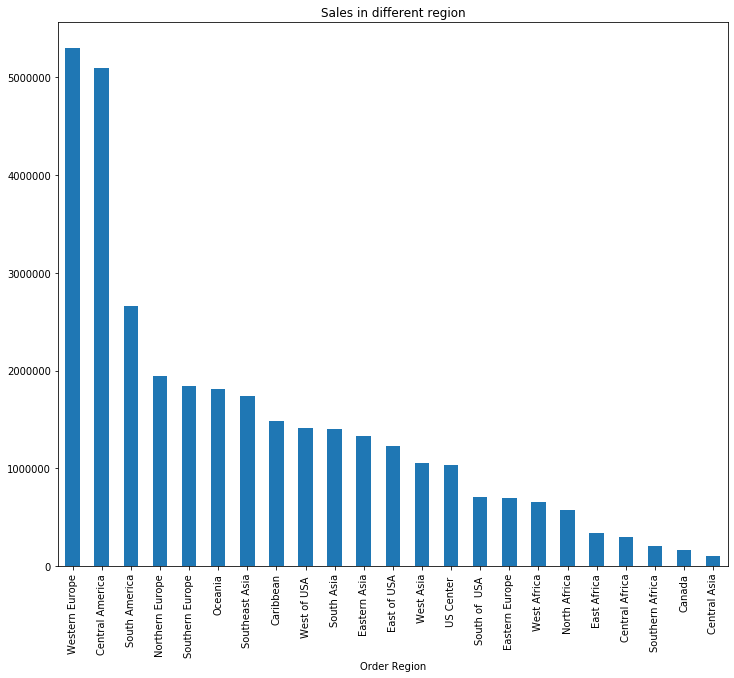

In [17]:

market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,10),title='Sales in different market')
# data.columns
plt.show() # 分布显示两张图
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,10),title='Sales in different region')
plt.show()

* 按Category Name 和 Sales per customer聚类

In [18]:
cat= data.groupby('Category Name')
cat['Sales per customer'].sum().sort_values(ascending=False)

Category Name
Fishing                 6.226935e+06
Cleats                  3.982857e+06
Camping & Hiking        3.700784e+06
Cardio Equipment        3.320251e+06
Women's Apparel         2.828708e+06
Water Sports            2.798044e+06
Men's Footwear          2.598494e+06
Indoor/Outdoor Games    2.596454e+06
Shop By Sport           1.177186e+06
Computers               5.953950e+05
Electronics             3.333273e+05
Cameras                 2.404967e+05
Garden                  2.317655e+05
Children's Clothing     2.092684e+05
Crafts                  2.007049e+05
Girls' Apparel          1.362068e+05
Women's Clothing        1.260069e+05
Accessories             1.197125e+05
Sporting Goods          1.050636e+05
Golf Gloves             1.047874e+05
Music                   1.016873e+05
Consumer Electronics    9.793756e+04
Golf Shoes              9.650647e+04
Health and Beauty       9.535811e+04
Kids' Golf Clubs        8.947370e+04
Baseball & Softball     8.436727e+04
Boxing & MMA            

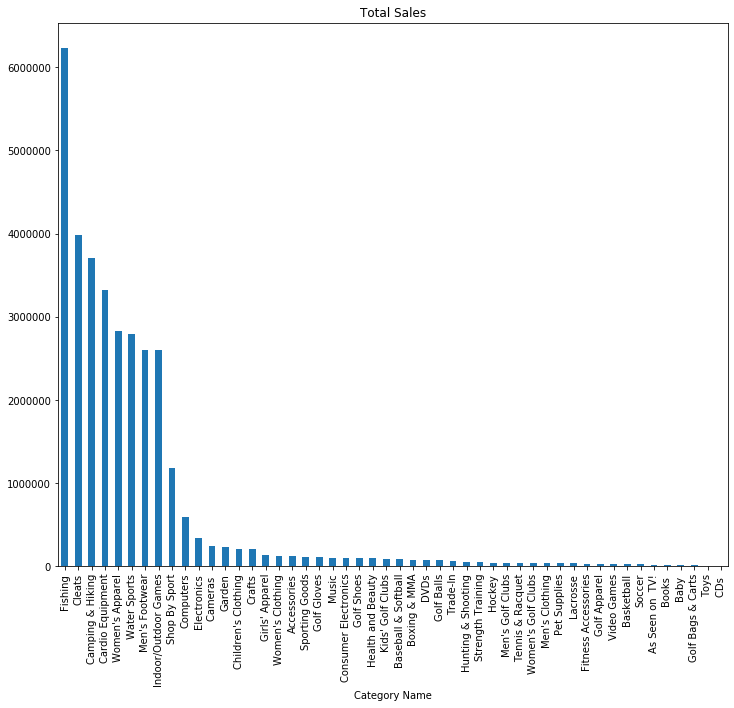

In [19]:

cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,10),title='Total Sales')
# data.columns
plt.show() # 分布显示两张图

* 创建时间戳索引,按时间维度分析

In [20]:
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [21]:
# 取order date (DateOrders)字段中的year,month,weekday,hour,month_year
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M')
data[['order date (DateOrders)','order_year','order_month','order_week_day','order_hour','order_month_year']]

,order date (DateOrders),order_year,order_month,order_week_day,order_hour,order_month_year
0,1/31/2018 22:56,2018,1,2,22,2018-01
1,1/13/2018 12:27,2018,1,5,12,2018-01
2,1/13/2018 12:06,2018,1,5,12,2018-01
3,1/13/2018 11:45,2018,1,5,11,2018-01
4,1/13/2018 11:24,2018,1,5,11,2018-01
...,...,...,...,...,...,...
180514,1/16/2016 3:40,2016,1,5,3,2016-01
180515,1/16/2016 1:34,2016,1,5,1,2016-01
180516,1/15/2016 21:00,2016,1,4,21,2016-01
180517,1/15/2016 20:18,2016,1,4,20,2016-01


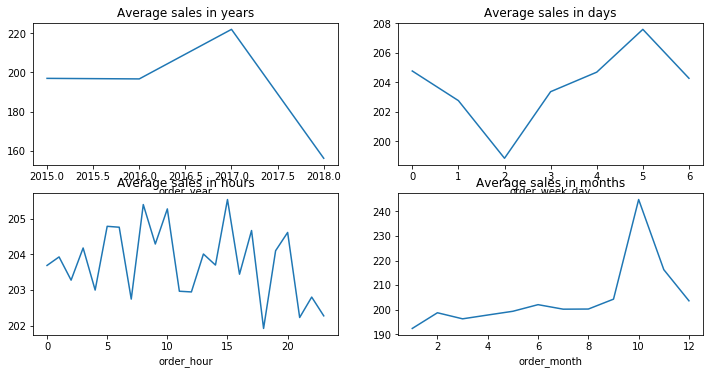

In [22]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,1) # 四个象限里的第一个
df_year= data.groupby('order_year')
df_year['Sales'].mean().plot(title='Average sales in years')
# plt.show()

plt.subplot(4,2,2) # 四个象限里的第2个
df_day= data.groupby('order_week_day')
df_day['Sales'].mean().plot(figsize=(12,12),title='Average sales in days')
# plt.show()

plt.subplot(4,2,3) # 四个象限里的第3个
df_hour= data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(12,12),title='Average sales in hours')
# plt.show()

plt.subplot(4,2,4) 
df_month= data.groupby('order_month')
df_month['Sales'].mean().plot(figsize=(12,12),title='Average sales in months')
plt.show()

* Product Price 和Sales per customer 相关性如何

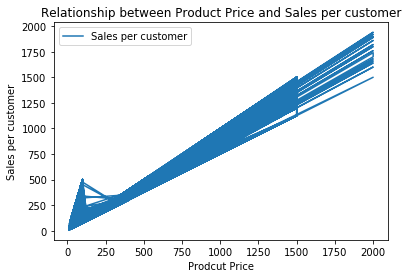

In [23]:

data.plot(x='Product Price',y = 'Sales per customer')
plt.title('Relationship between Product Price and Sales per customer')
plt.xlabel('Prodcut Price')
plt.ylabel('Sales per customer')
plt.show()

In [24]:
import numpy as np
np.sort(data['Product Price'])

array([   9.98999977,    9.98999977,    9.98999977, ..., 1999.98999   ,
       1999.98999   , 1999.98999   ])

In [25]:
# 时间类型转换
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
# 统计最后一笔订单时间
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [26]:
import datetime
present= datetime.datetime(2018,2,1)
present


datetime.datetime(2018, 2, 1, 0, 0)

In [27]:
# list(data.groupby('Order Customer Id')['Order Id'])

In [28]:
# 计算每个用的RFM指标
customer_seg= data.groupby('Order Customer Id').agg({'order date (DateOrders)':lambda x:(present-x.max()).days,\
                                                    'Order Id':lambda x:len(x),'Sales':lambda x:x.sum()})
customer_seg

,order date (DateOrders),Order Id,Sales
Order Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [29]:
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 4
    if a <= c[b][0.50]:
        return 3
    if a <= c[b][0.75]:
        return 2
    return 1
# Frequency Money越大越好
def FM_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    if a <= c[b][0.50]:
        return 2
    if a <= c[b][0.75]:
        return 3
    return 4

In [30]:
# order date (DateOrders)	Order Id	Sales
# 将字段名称改成R_Value,M_Value
customer_seg.rename(columns={'order date (DateOrders)':'R_Value','Order Id':'F_Value','Sales':'M_Value'},inplace=True)
customer_seg

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [31]:
# 将RFM划分为四个尺度
quantiles = customer_seg.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'R_Value': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0},
 'F_Value': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'M_Value': {0.25: 293.0400085, 0.5: 1499.82503324, 0.75: 2915.8800654175}}

* 用户等级特征选择，

In [32]:
# 新建R_Score,用于将R_Value =>[1,4]
customer_seg['R_Score'] = customer_seg['R_Value'].apply(R_Score,args=('R_Value',quantiles))
customer_seg['F_Score'] = customer_seg['F_Value'].apply(R_Score,args=('F_Value',quantiles))
customer_seg['M_Score'] = customer_seg['M_Value'].apply(R_Score,args=('M_Value',quantiles))
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,499.950012,1,4,3
2,136,10,1819.730034,3,2,2
3,229,18,3537.680094,2,1,1
4,380,14,1719.630030,1,2,2
5,457,7,1274.750023,1,3,3
...,...,...,...,...,...,...
20753,0,1,215.820007,4,4,4
20754,0,1,215.820007,4,4,4
20755,0,1,327.750000,4,4,3


In [33]:
def RFM_User(df):
    if df['M_Score'] > 2 and df['F_Score'] >2 and df['R_Score'] >2:
        return '重要价值用户'
    if df['M_Score'] > 2 and df['F_Score'] <= 2 and df['R_Score'] >2:
        return '重要发展用户'
    if df['M_Score'] > 2 and df['F_Score'] > 2 and df['R_Score'] <= 2:
        return '重要保持用户'
    if df['M_Score'] > 2 and df['F_Score'] <= 2 and df['R_Score'] <= 2:
        return '重要挽留用户'
    if df['M_Score'] <= 2 and df['F_Score'] > 2 and df['R_Score'] > 2:
        return '一般价值用户'
    if df['M_Score'] <= 2 and df['F_Score'] <= 2 and df['R_Score'] >2:
        return '一般发展用户'
    if df['M_Score'] <= 2 and df['F_Score'] <= 2 and df['R_Score'] >2:
        return '一般保持用户'
    if df['M_Score'] <= 2 and df['F_Score'] <= 2 and df['R_Score'] <= 2:
        return '一般挽留用户'



In [34]:
customer_seg['Customer_Segmentation'] = customer_seg.apply(RFM_User,axis=1)
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,Customer_Segmentation
Order Customer Id,,,,,,,
1,792,1,499.950012,1,4,3,重要保持用户
2,136,10,1819.730034,3,2,2,一般发展用户
3,229,18,3537.680094,2,1,1,一般挽留用户
4,380,14,1719.630030,1,2,2,一般挽留用户
5,457,7,1274.750023,1,3,3,重要保持用户
...,...,...,...,...,...,...,...
20753,0,1,215.820007,4,4,4,重要价值用户
20754,0,1,215.820007,4,4,4,重要价值用户
20755,0,1,327.750000,4,4,3,重要价值用户


* 聚合支付方式

In [35]:
data['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [36]:
pay_type1 = data[data['Type']== 'DEBIT'] 
pay_type2 = data[data['Type']== 'TRANSFER'] 
pay_type3 = data[data['Type']== 'PAYMENT'] 
pay_type4 = data[data['Type']== 'CASH'] 
pay_type1 

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,HollowayCally,2018,1,2,22,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TateTana,2018,1,5,11,2018-01
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 10:42,First Class,TerrellConstance,2018,1,5,10,2018-01
13,DEBIT,2,1,24.580000,245.809998,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 8:15,First Class,McfaddenNatalie,2018,1,5,8,2018-01
15,DEBIT,2,1,-259.579987,324.470001,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 7:33,First Class,LancasterSade,2018,1,5,7,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180505,DEBIT,2,4,112.669998,359.980011,Advance shipping,0,45,Fishing,Highland,...,399.980011,0,1/18/2016 13:28,Standard Class,BriggsChristine,2016,1,5,13,2016-01
180508,DEBIT,4,2,85.000000,339.980011,Late delivery,1,45,Fishing,Waipahu,...,399.980011,0,1/20/2016 7:10,Second Class,FuentesRichard,2016,1,5,7,2016-01
180511,DEBIT,2,2,157.429993,327.980011,Shipping on time,0,45,Fishing,Chula Vista,...,399.980011,0,1/18/2016 6:28,Second Class,SmithOlivia,2016,1,5,6,2016-01
180512,DEBIT,6,4,86.400002,319.980011,Late delivery,1,45,Fishing,Caguas,...,399.980011,0,1/22/2016 6:07,Standard Class,MaddenMary,2016,1,5,6,2016-01


In [37]:
pay_type2

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full name,order_year,order_month,order_week_day,order_hour,order_month_year
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,LunaIrene,2018,1,5,12,2018-01
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,327.750000,0,1/19/2018 11:03,Standard Class,FlowersKimberly,2018,1,5,11,2018-01
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,327.750000,0,1/15/2018 10:21,First Class,StevensErica,2018,1,5,10,2018-01
10,TRANSFER,6,2,130.580002,272.029999,Shipping canceled,0,73,Sporting Goods,Caguas,...,327.750000,0,1/19/2018 9:18,Second Class,ShortGermane,2018,1,5,9,2018-01
11,TRANSFER,5,2,45.689999,268.760010,Late delivery,1,73,Sporting Goods,Freeport,...,327.750000,0,1/18/2018 8:57,Second Class,RobbinsFreya,2018,1,5,8,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180485,TRANSFER,4,4,11.160000,371.980011,Shipping on time,0,45,Fishing,San Pablo,...,399.980011,0,1/21/2016 14:42,Standard Class,BensonMary,2016,1,6,14,2016-01
180487,TRANSFER,3,4,27.000000,359.980011,Advance shipping,0,45,Fishing,Rowland Heights,...,399.980011,0,1/20/2016 12:36,Standard Class,LarsonMary,2016,1,6,12,2016-01
180490,TRANSFER,4,4,-59.840000,339.980011,Shipping canceled,0,45,Fishing,Madera,...,399.980011,0,1/21/2016 5:56,Standard Class,GuerraMary,2016,1,6,5,2016-01
180491,TRANSFER,3,4,33.599998,335.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,0,1/20/2016 5:35,Standard Class,SmithEmma,2016,1,6,5,2016-01


In [38]:
# 获取4种支付方式中，不同地区的特点
count1 = pay_type1['Order Region'].value_counts()
count2 = pay_type2['Order Region'].value_counts()
count3 = pay_type3['Order Region'].value_counts()
count4 = pay_type4['Order Region'].value_counts()

In [39]:
count1

Central America    10804
Western Europe     10362
South America       5536
Oceania             3985
Northern Europe     3807
Southern Europe     3656
Southeast Asia      3567
West of USA         3187
Caribbean           3101
South Asia          3009
East of USA         2776
Eastern Asia        2634
US Center           2317
West Asia           2306
Eastern Europe      1577
South of  USA       1525
West Africa         1502
North Africa        1235
East Africa          737
Central Africa       659
Southern Africa      485
Canada               311
Central Asia         217
Name: Order Region, dtype: int64

In [40]:
count2

Central America    8047
Western Europe     7457
South America      4236
Northern Europe    2645
Oceania            2644
Southeast Asia     2622
Southern Europe    2540
Caribbean          2424
West of USA        2249
South Asia         2097
Eastern Asia       2058
East of USA        1818
West Asia          1636
US Center          1581
South of  USA      1142
Eastern Europe     1043
West Africa         993
North Africa        950
East Africa         488
Central Africa      472
Canada              313
Southern Africa     293
Central Asia        135
Name: Order Region, dtype: int64

* 刻画每个区的支付方式

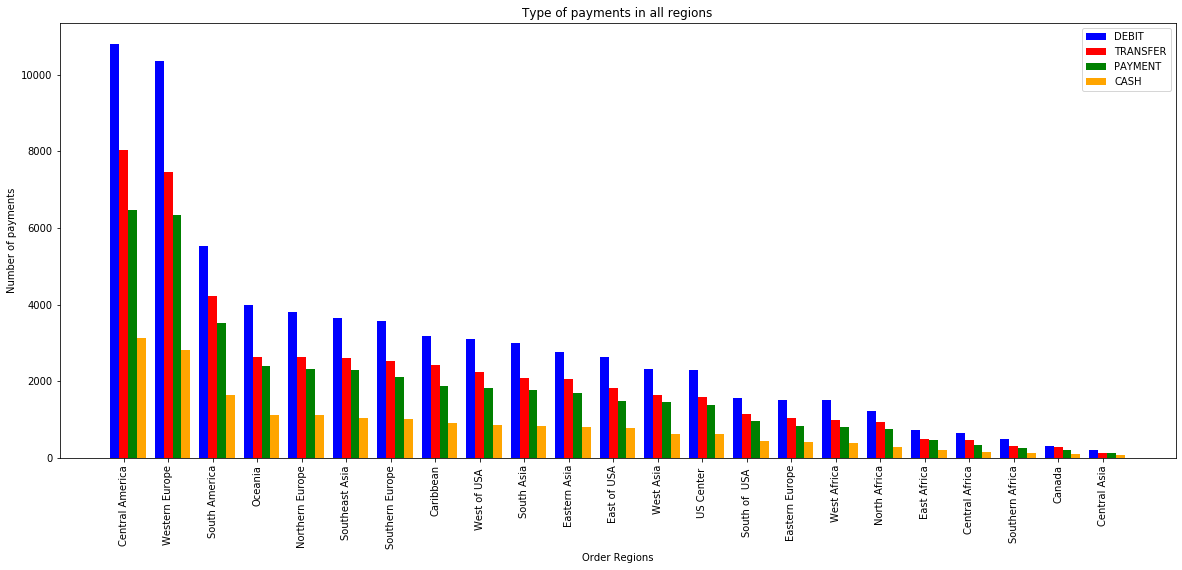

In [41]:

# 获取地区region的个数
region_num = len(count1)
fig,ax = plt.subplots(figsize = (20,8))
index = np.arange(region_num)
# index
# 每种类型的显示间隔
bar_width = 0.2
type1 = plt.bar(index,count1,bar_width,color='b',label='DEBIT')
type2 = plt.bar(index+bar_width,count2,bar_width,color='r',label='TRANSFER')
type3 = plt.bar(index+bar_width*2,count3,bar_width,color='green',label='PAYMENT')
type4 = plt.bar(index+bar_width*3,count4,bar_width,color='orange',label='CASH')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Type of payments in all regions')
plt.legend()

# 显示刻度
names = data['Order Region'].value_counts().keys()
plt.xticks(index+bar_width,names,rotation='vertical') # rotation='vertical'垂直方式
plt.show()

In [42]:
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,HollowayCally,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,LunaIrene,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.750000,0,1/17/2018 12:06,Standard Class,MaldonadoGillian,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TateTana,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 11:24,Standard Class,HendricksOrli,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,399.980011,0,1/20/2016 3:40,Standard Class,PetersonMaria,2016,1,5,3,2016-01
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,399.980011,0,1/19/2016 1:34,Second Class,ClarkRonald,2016,1,5,1,2016-01
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,399.980011,0,1/20/2016 21:00,Standard Class,SmithJohn,2016,1,4,21,2016-01
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,0,1/18/2016 20:18,Standard Class,SmithMary,2016,1,4,20,2016-01


### 结论：
* 借记卡是所有地区使用最多的支付方式
* 现金是所有地区使用最少的支付方式



#### 对负收益产品进行探索

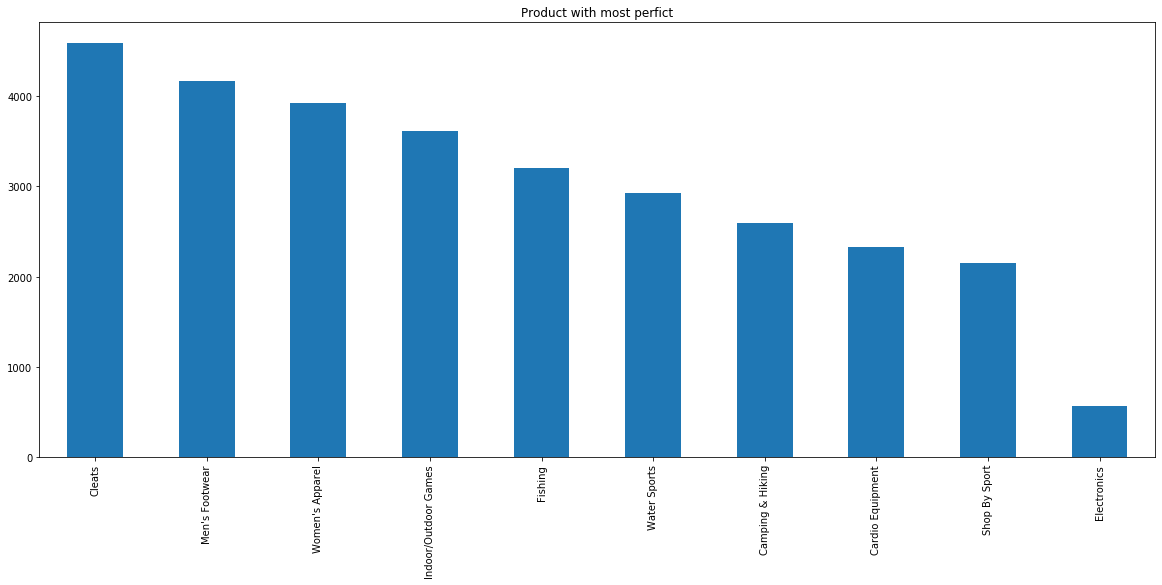

In [43]:

loss = data[data['Benefit per order']<0]
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Product with most perfict')

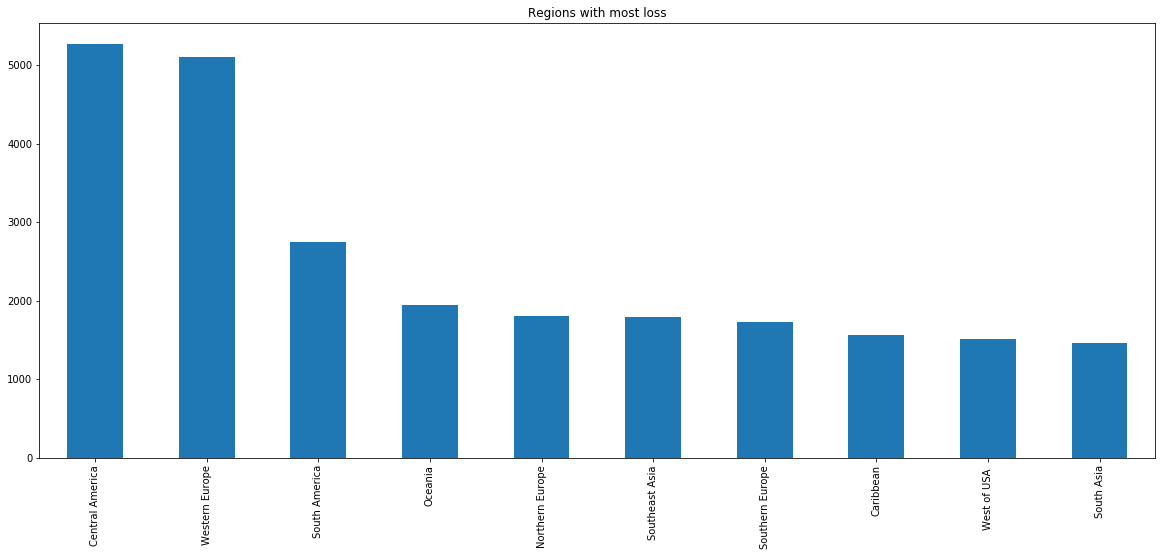

In [44]:
# 显示Top10 的负收益地区
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title="Regions with most loss")

#### 结果显示Central America和Western Europe负收益最严重，南亚和非洲也有一部分负收益

In [45]:
# 所有负收益带来的损失
print('总损失',loss['Benefit per order'].sum())

总损失 -3883547.345768667


In [46]:
data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

* SUSPECTED_FRAUD 欺诈订单

In [47]:
data[data['Order Status']== 'SUSPECTED_FRAUD']['Type'].value_counts() 

TRANSFER    4062
Name: Type, dtype: int64

#### 由上可知TRANSFER 容易导致欺诈交易

In [48]:
high_fraud = data[data['Order Status'] == 'SUSPECTED_FRAUD']
high_fraud

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full name,order_year,order_month,order_week_day,order_hour,order_month_year
10,TRANSFER,6,2,130.580002,272.029999,Shipping canceled,0,73,Sporting Goods,Caguas,...,327.750000,0,1/19/2018 9:18,Second Class,ShortGermane,2018,1,5,9,2018-01
24,TRANSFER,2,2,90.279999,288.420013,Shipping canceled,0,73,Sporting Goods,Billings,...,327.750000,0,1/15/2018 4:24,Second Class,VanceSimone,2018,1,5,4,2018-01
183,TRANSFER,5,4,28.850000,128.220001,Shipping canceled,0,13,Electronics,Freeport,...,44.990002,0,5/13/2016 17:42,Standard Class,PetersenPatricia,2016,5,6,17,2016-05
184,TRANSFER,5,4,133.910004,278.970001,Shipping canceled,0,9,Cardio Equipment,Fort Washington,...,99.989998,0,4/7/2016 19:51,Standard Class,PetersenJulie,2016,4,5,19,2016-04
185,TRANSFER,6,4,79.160004,272.970001,Shipping canceled,0,9,Cardio Equipment,Bakersfield,...,99.989998,0,8/20/2016 2:51,Standard Class,SmithLisa,2016,8,6,2,2016-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180274,TRANSFER,5,2,163.190002,339.980011,Shipping canceled,0,45,Fishing,Caguas,...,399.980011,0,2/3/2016 3:49,Second Class,SmithWilliam,2016,1,4,3,2016-01
180309,TRANSFER,2,1,114.830002,347.980011,Shipping canceled,0,45,Fishing,Modesto,...,399.980011,0,1/28/2016 21:52,First Class,SmithJames,2016,1,1,21,2016-01
180352,TRANSFER,4,4,90.000000,399.980011,Shipping canceled,0,45,Fishing,Albuquerque,...,399.980011,0,1/29/2016 3:08,Standard Class,SmithMary,2016,1,0,3,2016-01
180406,TRANSFER,6,4,-333.179993,399.980011,Shipping canceled,0,45,Fishing,Caguas,...,399.980011,0,1/28/2016 12:46,Standard Class,McguireAnthony,2016,1,4,12,2016-01


In [49]:
high_fraud['Order Region']

10          Eastern Asia
24               Oceania
183           US Center 
184         West of USA 
185         West of USA 
               ...      
180274      Eastern Asia
180309      Eastern Asia
180352    Southeast Asia
180406        South Asia
180490        South Asia
Name: Order Region, Length: 4062, dtype: object

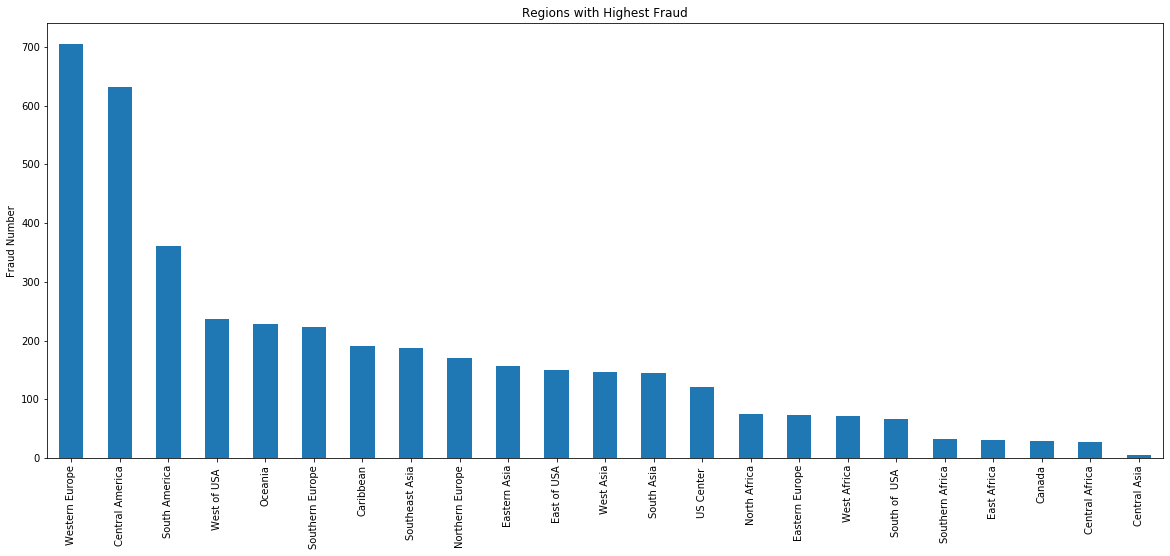

In [50]:
high_fraud['Order Region'].value_counts().plot.bar(figsize=(20,8))
plt.title('Regions with Highest Fraud')
plt.ylabel('Fraud Number')
plt.show()

#### 由上可知：
* 西欧、中美洲、南美洲存在较多涉嫌欺诈的供应链订单

#### 展示涉嫌欺诈的商品以及欺诈最严重地区Western Europe到底涉及哪些商品最多

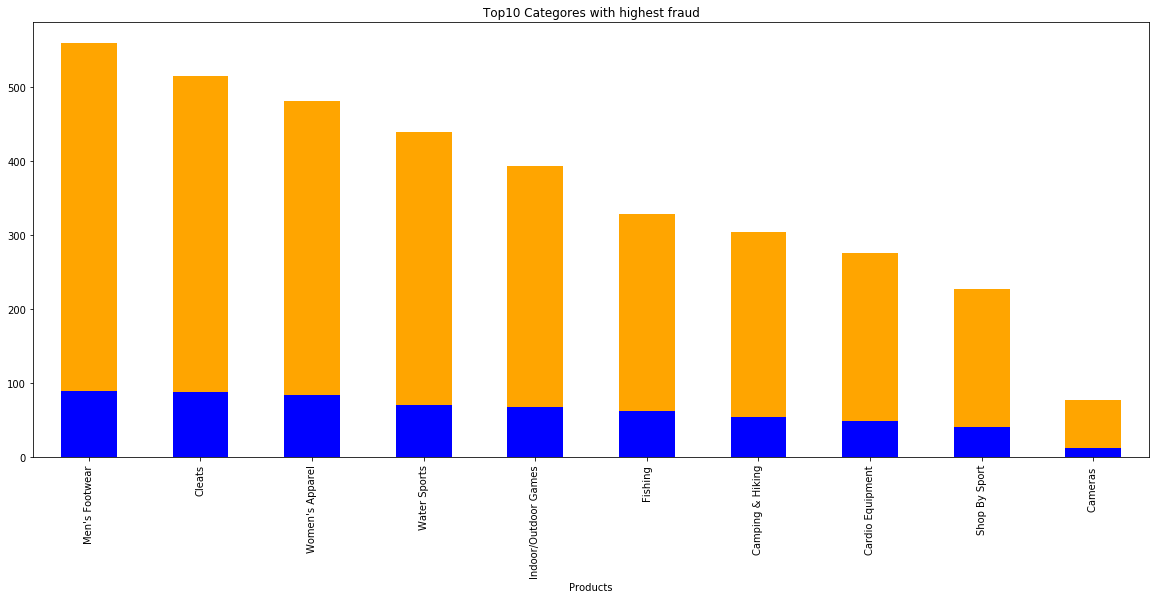

In [51]:
# Western Europe 地区欺诈交易最多，就一个bar凤城2个部分
high_fraud_total= data[data['Order Status']=='SUSPECTED_FRAUD']
high_fraud_we = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Order Region'] == 'Western Europe')]
# 找出风险最高的10个Category
high_fraud_total["Category Name"].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Fraud Category name',color='orange')
high_fraud_we["Category Name"].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Fraud Category in Western Europe',color='blue')
plt.title('Top10 Categores with highest fraud')
plt.xlabel("Products")
plt.show()

* 找出对应的前十个供应商

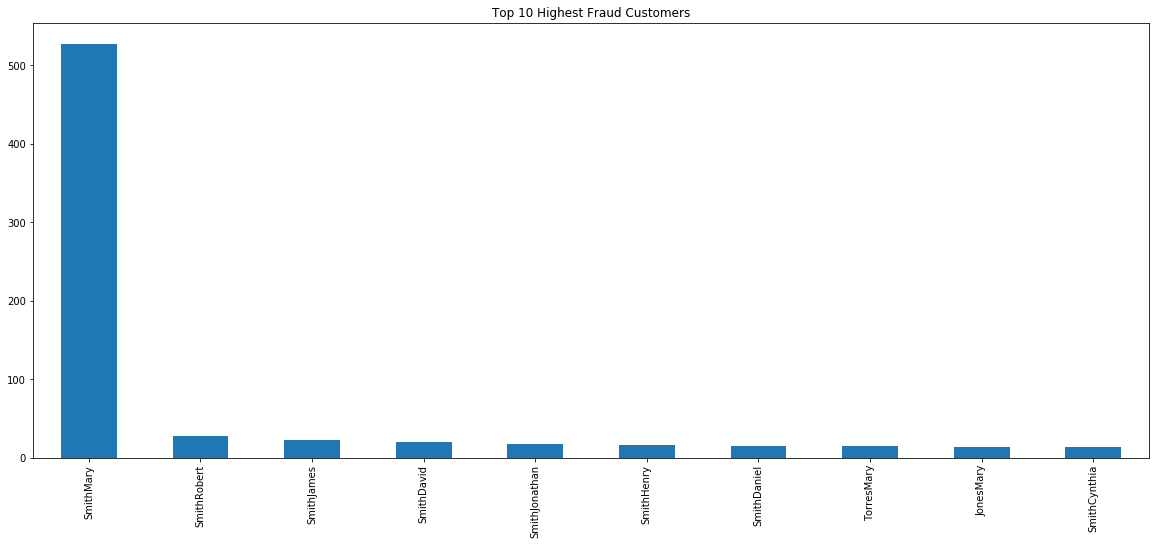

In [52]:
# 筛选出top 10 Customer
cus = data[data['Order Status']== 'SUSPECTED_FRAUD']
cus['Customer Full name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Top 10 Highest Fraud Customers')

* SmithMary这个供应商涉嫌欺诈极为严重

In [53]:
# 找到MarySmith的交易金额
print(data[data['Customer Full name'] == 'SmithMary']['Sales'].sum())
print(data[(data['Customer Full name'] == 'SmithMary') & (data['Order Status'] == 'SUSPECTED_FRAUD')]['Sales'].sum())

4771645.883297398
102491.66191043999


In [54]:
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,HollowayCally,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,LunaIrene,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.750000,0,1/17/2018 12:06,Standard Class,MaldonadoGillian,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TateTana,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 11:24,Standard Class,HendricksOrli,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,399.980011,0,1/20/2016 3:40,Standard Class,PetersonMaria,2016,1,5,3,2016-01
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,399.980011,0,1/19/2016 1:34,Second Class,ClarkRonald,2016,1,5,1,2016-01
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,399.980011,0,1/20/2016 21:00,Standard Class,SmithJohn,2016,1,4,21,2016-01
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,0,1/18/2016 20:18,Standard Class,SmithMary,2016,1,4,20,2016-01


In [55]:
import pickle
with open('data.pkl','wb') as file:
    pickle.dump(data,file)

In [115]:
with open('data.pkl','rb') as file:
    train_data = pickle.load(file)

train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,HollowayCally,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,LunaIrene,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.750000,0,1/17/2018 12:06,Standard Class,MaldonadoGillian,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TateTana,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 11:24,Standard Class,HendricksOrli,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,399.980011,0,1/20/2016 3:40,Standard Class,PetersonMaria,2016,1,5,3,2016-01
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,399.980011,0,1/19/2016 1:34,Second Class,ClarkRonald,2016,1,5,1,2016-01
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,399.980011,0,1/20/2016 21:00,Standard Class,SmithJohn,2016,1,4,21,2016-01
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,0,1/18/2016 20:18,Standard Class,SmithMary,2016,1,4,20,2016-01


In [116]:
train_data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

* 把属于SUSPECTED_FRAUD、Late delivery的两种都分别变为1，其他变为0

In [117]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD',1,0)
train_data['fraud']

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: fraud, Length: 180519, dtype: int64

In [118]:
train_data['late_delivery'] = np.where(train_data['Delivery Status'] == 'Late delivery',1,0)
# train_data['Delivery Status'].value_counts()
train_data['late_delivery']

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: late_delivery, Length: 180519, dtype: int64

In [119]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 61 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [120]:
#train_data.columns
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Order Status', 'Product Image', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Full name'],
      dtype='object')

* 删除掉没用的'Order Status','Delivery Status'两列

In [121]:
# train_data.columns
train_data.drop(['Order Status','Delivery Status'],axis=1,inplace =True)

In [122]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 59 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Late_delivery_risk             180519 non-null  int64         
 6   Category Id                    180519 non-null  int64         
 7   Category Name                  180519 non-null  object        
 8   Customer City                  180519 non-null  object        
 9   Customer Country               180519 non-null  object        
 10  Customer Email                 180519 non-null  object        
 11  

* 邮箱已经脱敏

In [123]:
train_data['Customer Email'].value_counts()

XXXXXXXXX    180519
Name: Customer Email, dtype: int64

In [124]:

train_data.drop(['Customer Email','Customer Password','Product Status','Product Image','Customer Lname','Customer Fname','Product Description'],axis= 1,inplace=True)
len(train_data.columns)

52

In [125]:
train_data.drop(['Order Zipcode','shipping date (DateOrders)','Latitude','Longitude','Customer Street'],axis= 1,inplace=True)

In [126]:
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode', 'Customer Full name'],
      dtype='object')

In [127]:
train_data[categorical_cols]

,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Name,Shipping Mode,Customer Full name
0,DEBIT,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,Smart watch,Standard Class,HollowayCally
1,TRANSFER,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,Smart watch,Standard Class,LunaIrene
2,CASH,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,Smart watch,Standard Class,MaldonadoGillian
3,DEBIT,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,Smart watch,Standard Class,TateTana
4,PAYMENT,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,Smart watch,Standard Class,HendricksOrli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Fishing,Brooklyn,EE. UU.,Home Office,NY,Fan Shop,Pacific Asia,Shanghái,China,Eastern Asia,Shanghái,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,PetersonMaria
180515,DEBIT,Fishing,Bakersfield,EE. UU.,Corporate,CA,Fan Shop,Pacific Asia,Hirakata,Japón,Eastern Asia,Osaka,Field & Stream Sportsman 16 Gun Fire Safe,Second Class,ClarkRonald
180516,TRANSFER,Fishing,Bristol,EE. UU.,Corporate,CT,Fan Shop,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,SmithJohn
180517,PAYMENT,Fishing,Caguas,Puerto Rico,Consumer,PR,Fan Shop,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,SmithMary


In [128]:
train_data=train_data.dropna(subset=['Customer Full name']) #subset定义在哪一列寻找空值

* 把表中所有object类型的字段数据标签编码化

In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat in categorical_cols:
    train_data[cat] = le.fit_transform(train_data[cat])
train_data[categorical_cols]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Name,Shipping Mode,Customer Full name
0,1,40,66,1,0,36,4,3,331,70,15,475,78,3,5638
1,3,40,66,1,0,36,4,3,391,69,13,841,78,3,7388
2,0,40,452,0,0,5,4,3,391,69,13,841,78,3,7510
3,1,40,285,0,2,5,4,3,3226,8,11,835,78,3,12404
4,2,40,66,1,1,36,4,3,3226,8,11,835,78,3,5318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,18,59,0,2,31,3,3,2922,31,7,913,24,3,9834
180515,1,18,26,0,1,5,3,3,1362,77,7,770,24,2,2275
180516,3,18,55,0,1,7,3,3,25,8,11,88,24,3,11821
180517,2,18,66,1,0,36,3,3,25,8,11,88,24,3,11861


In [130]:
categorical_cols.tolist()

['Type',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'Order Region',
 'Order State',
 'Product Name',
 'Shipping Mode',
 'Customer Full name']

In [131]:
# 得到所有数据类型
numerical_columns = train_data.columns.tolist()
for x in categorical_cols.tolist():
    numerical_columns.remove(x)
numerical_columns

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Card Id',
 'Product Category Id',
 'Product Price',
 'order_year',
 'order_month',
 'order_week_day',
 'order_hour',
 'order_month_year',
 'fraud',
 'late_delivery']

* 去除无关字段数据

In [132]:
train_data.drop(['Order Customer Id','Order Item Cardprod Id','Order Item Id','Sales per customer',
                 'Order Item Total','Order Profit Per Order','Product Card Id','Product Category Id',
                 'Product Price','order date (DateOrders)','order_month_year'],axis =1,inplace=True)
train_data

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Order State,Product Name,Shipping Mode,Customer Full name,order_year,order_month,order_week_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,0,73,40,66,1,20755,...,475,78,3,5638,2018,1,2,22,0,0
1,3,5,4,-249.089996,1,73,40,66,1,19492,...,841,78,3,7388,2018,1,5,12,0,1
2,0,4,4,-247.779999,0,73,40,452,0,19491,...,841,78,3,7510,2018,1,5,12,0,0
3,1,3,4,22.860001,0,73,40,285,0,19490,...,835,78,3,12404,2018,1,5,11,0,0
4,2,2,4,134.210007,0,73,40,66,1,19489,...,835,78,3,5318,2018,1,5,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,0,45,18,59,0,1005,...,913,24,3,9834,2016,1,5,3,0,0
180515,1,3,2,-613.770019,1,45,18,26,0,9141,...,770,24,2,2275,2016,1,5,1,0,1
180516,3,5,4,141.110001,1,45,18,55,0,291,...,88,24,3,11821,2016,1,4,21,0,1
180517,2,3,4,186.229996,0,45,18,66,1,2813,...,88,24,3,11861,2016,1,4,20,0,0


#### 提取监督标记样本
* fraud欺诈样本

In [133]:
x_fraud = train_data.loc[:,train_data.columns != 'fraud']
y_fraud = train_data['fraud']
x_fraud

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Order Region,Order State,Product Name,Shipping Mode,Customer Full name,order_year,order_month,order_week_day,order_hour,late_delivery
0,1,3,4,91.250000,0,73,40,66,1,20755,...,15,475,78,3,5638,2018,1,2,22,0
1,3,5,4,-249.089996,1,73,40,66,1,19492,...,13,841,78,3,7388,2018,1,5,12,1
2,0,4,4,-247.779999,0,73,40,452,0,19491,...,13,841,78,3,7510,2018,1,5,12,0
3,1,3,4,22.860001,0,73,40,285,0,19490,...,11,835,78,3,12404,2018,1,5,11,0
4,2,2,4,134.210007,0,73,40,66,1,19489,...,11,835,78,3,5318,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,0,45,18,59,0,1005,...,7,913,24,3,9834,2016,1,5,3,0
180515,1,3,2,-613.770019,1,45,18,26,0,9141,...,7,770,24,2,2275,2016,1,5,1,1
180516,3,5,4,141.110001,1,45,18,55,0,291,...,11,88,24,3,11821,2016,1,4,21,1
180517,2,3,4,186.229996,0,45,18,66,1,2813,...,11,88,24,3,11861,2016,1,4,20,0


In [134]:
y_fraud.value_counts()

0    176449
1      4062
Name: fraud, dtype: int64

* late_delivery迟交货订单

In [135]:
x_late= train_data.loc[:,train_data.columns != 'late_delivery']
y_late =train_data['late_delivery']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
x_late

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Order Region,Order State,Product Name,Shipping Mode,Customer Full name,order_year,order_month,order_week_day,order_hour,fraud
0,1,3,4,91.250000,0,73,40,66,1,20755,...,15,475,78,3,5638,2018,1,2,22,0
1,3,5,4,-249.089996,1,73,40,66,1,19492,...,13,841,78,3,7388,2018,1,5,12,0
2,0,4,4,-247.779999,0,73,40,452,0,19491,...,13,841,78,3,7510,2018,1,5,12,0
3,1,3,4,22.860001,0,73,40,285,0,19490,...,11,835,78,3,12404,2018,1,5,11,0
4,2,2,4,134.210007,0,73,40,66,1,19489,...,11,835,78,3,5318,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,0,45,18,59,0,1005,...,7,913,24,3,9834,2016,1,5,3,0
180515,1,3,2,-613.770019,1,45,18,26,0,9141,...,7,770,24,2,2275,2016,1,5,1,0
180516,3,5,4,141.110001,1,45,18,55,0,291,...,11,88,24,3,11821,2016,1,4,21,0
180517,2,3,4,186.229996,0,45,18,66,1,2813,...,11,88,24,3,11861,2016,1,4,20,0


In [136]:
y_late.value_counts() 

1    98973
0    81538
Name: late_delivery, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split
# 数据切分
x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test = train_test_split(x_fraud,y_fraud,test_size=0.2)
x_late_train,x_late_test,y_late_train,y_late_test = train_test_split(x_late,y_late,test_size=0.2)

* 数据规范化

In [138]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_fraud_train = sc.fit_transform(x_fraud_train)
x_fraud_test = sc.fit_transform(x_fraud_test)

x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.fit_transform(x_late_test)

In [139]:
x_fraud_train

array([[-0.67980717,  1.54130885,  0.77561877, ..., -1.50508236,
        -0.79342695,  0.90834172],
       [-1.68502522,  1.54130885,  0.77561877, ..., -1.00541126,
        -0.35973563,  0.90834172],
       [ 1.33062892,  0.30839837,  0.77561877, ..., -0.00606908,
        -0.64886317, -1.10090727],
       ...,
       [-1.68502522,  0.30839837,  0.77561877, ..., -1.50508236,
        -0.93799072, -1.10090727],
       [-0.67980717, -1.54096735, -2.13679361, ...,  0.99327311,
         1.51959342,  0.90834172],
       [ 0.32541087, -0.92451211, -1.40869051, ..., -1.00541126,
        -0.35973563,  0.90834172]])

In [140]:
x_late_train

array([[-0.67989068,  0.92535439, -0.67657861, ..., -0.50345601,
        -1.37289091, -0.15168834],
       [-0.67989068,  0.30976726,  0.77760017, ...,  0.49587151,
         0.21728458, -0.15168834],
       [ 0.32637819, -0.92140701, -0.67657861, ..., -1.50278352,
         1.22921444, -0.15168834],
       ...,
       [ 1.33264706,  0.92535439,  0.77760017, ...,  0.99553526,
         0.5064074 , -0.15168834],
       [ 1.33264706, -0.92140701,  0.77760017, ..., -1.50278352,
        -0.93920669, -0.15168834],
       [-0.67989068, -0.92140701, -1.403668  , ..., -0.00379225,
        -1.37289091, -0.15168834]])

In [151]:
y_late_train.

142116    1
60864     0
166453    0
161383    1
1143      0
         ..
147474    1
43239     1
85892     1
113486    0
147600    1
Name: late_delivery, Length: 144408, dtype: int64

In [141]:
accuracy_list = {}
recall_list ={}
auc_list={}
f1_list= {}

from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix,f1_score
def model_stats(model,x_train,x_test,y_train,y_test,name='Fraud'):
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred,y_test)
    recall = recall_score(y_pred,y_test)
    auc = roc_auc_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test)
    confusion = confusion_matrix(y_pred,y_test)
    
    accuracy_list[name,model] = accuracy
    recall_list[name,model]=recall
    auc_list[name,model] = auc
    f1_list[name,model]= f1
    
    print('Model Used:',model)
    print('{} Accuracy: {}%'.format(name,accuracy*100))
    print('{} Recall: {}%'.format(name,recall*100))
    print("{} AUC:{}%".format(name,auc*100))
    print('{} F1 Score: {}%'.format(name,f1*100))
    print('{} Confusion Matrix:\n{}'.format(name,confusion))
#     return accuracy,recall, f1
    return model

### 使用多种模型预测

#### LR，
#### GaussianNB，
#### BernoulliNB
#### LinearSVC，
#### KNeighborsClassifier，
#### LinearDiscriminantAnalysis，
#### DecisionTreeClassifier，
#### RandomForestClassifier，
#### XGBClassifier

In [142]:
from sklearn.linear_model import LogisticRegression
# 逻辑回归模型
model_fraud_lr=model_fraud = LogisticRegression(solver='lbfgs', max_iter=100)
model_late_lr=model_late = LogisticRegression(solver='lbfgs', max_iter=100)
model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'Fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

/home/stu_15012480609/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Used: LogisticRegression()
Fraud Accuracy: 97.82289560424341%
Fraud Recall: 55.26992287917738%
Fraud AUC:76.77815458513386%
Fraud F1 Score: 35.361842105263165%
Fraud Confusion Matrix:
[[35102   612]
 [  174   215]]
Model Used: LogisticRegression()
Late Delivery Accuracy: 100.0%
Late Delivery Recall: 100.0%
Late Delivery AUC:100.0%
Late Delivery F1 Score: 100.0%
Late Delivery Confusion Matrix:
[[16376     0]
 [    0 19727]]


LogisticRegression()

In [143]:
# x_late.columns
accuracy_list

{('Fraud', LogisticRegression()): 0.9782289560424341,
 ('Late Delivery', LogisticRegression()): 1.0}

In [146]:

from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor

# 高斯朴素贝叶斯
model_fraud = GaussianNB()
model_late = GaussianNB()

# 模型评估
model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'Fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')



/home/stu_15012480609/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [147]:
model_fraud = BernoulliNB()
model_late = BernoulliNB()

# 模型评估
model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'Fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

/home/stu_15012480609/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [152]:
from sklearn import svm
# SVM 模型
model_fraud_svc=model_fraud = svm.LinearSVC()
model_late_svc=model_late = svm.LinearSVC()
model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'Fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

/home/stu_15012480609/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model Used: LinearSVC()
Fraud Accuracy: 97.80073678087695%
Fraud Recall: 55.30546623794213%
Fraud AUC:76.73772417842568%
Fraud F1 Score: 30.228471001757466%
Fraud Confusion Matrix:
[[35137   655]
 [  139   172]]
Model Used: LinearSVC()
Late Delivery Accuracy: 100.0%
Late Delivery Recall: 100.0%
Late Delivery AUC:100.0%
Late Delivery F1 Score: 100.0%
Late Delivery Confusion Matrix:
[[16376     0]
 [    0 19727]]


/home/stu_15012480609/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [153]:
model_fraud_dt=model_fraud = DecisionTreeClassifier()
model_late_dt=model_late = DecisionTreeClassifier()
model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'Fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')


Model Used: DecisionTreeClassifier()
Fraud Accuracy: 98.66493089216962%
Fraud Recall: 68.77040261153428%
Fraud AUC:84.1080867082228%
Fraud F1 Score: 72.39404352806415%
Fraud Confusion Matrix:
[[34989   195]
 [  287   632]]
Model Used: DecisionTreeClassifier()
Late Delivery Accuracy: 100.0%
Late Delivery Recall: 100.0%
Late Delivery AUC:100.0%
Late Delivery F1 Score: 100.0%
Late Delivery Confusion Matrix:
[[16376     0]
 [    0 19727]]


DecisionTreeClassifier()

In [154]:
accuracy_list

{('Fraud', LogisticRegression()): 0.9782289560424341,
 ('Late Delivery', LogisticRegression()): 1.0,
 ('Fraud', LinearSVC()): 0.9779519707503531,
 ('Late Delivery', LinearSVC()): 1.0,
 ('Fraud', DecisionTreeClassifier()): 0.9864831177464477,
 ('Late Delivery', DecisionTreeClassifier()): 1.0,
 ('Fraud', LinearSVC()): 0.9780073678087694,
 ('Late Delivery', LinearSVC()): 1.0,
 ('Fraud', DecisionTreeClassifier()): 0.9866493089216962,
 ('Late Delivery', DecisionTreeClassifier()): 1.0}

In [155]:
model_fraud.feature_importances_

array([0.05981725, 0.11760993, 0.00617474, 0.00900493, 0.        ,
       0.00303911, 0.00342286, 0.04408711, 0.00118802, 0.07836386,
       0.01991274, 0.021876  , 0.03117851, 0.00160812, 0.00262461,
       0.00507062, 0.0589453 , 0.03973103, 0.06626368, 0.00636556,
       0.00296302, 0.00391001, 0.00877685, 0.00140277, 0.00479451,
       0.02501777, 0.05412785, 0.00545205, 0.06386621, 0.07442784,
       0.00526395, 0.02203092, 0.03313048, 0.04080258, 0.0777492 ])

In [156]:
model_fraud.feature_importances_.argsort()

array([ 4,  8, 23, 13, 14, 20,  5,  6, 21, 24, 15, 30, 27,  2, 19, 22,  3,
       10, 11, 31, 25, 12, 32, 17, 33,  7, 26, 16,  0, 28, 18, 29, 34,  9,
        1])

In [157]:
#根据决策树模型，得到feature importance
importance_col = model_fraud.feature_importances_.argsort()
# importance_col
# model_fraud.feature_importances_
feat_importance = pd.DataFrame({'features':x_fraud.columns[importance_col],'importance':model_fraud.feature_importances_[importance_col]})
feat_importance



,features,importance
0,Late_delivery_risk,0.000000
1,Customer Country,0.001188
2,Order Item Quantity,0.001403
3,Department Id,0.001608
4,Department Name,0.002625
5,Order Item Discount Rate,0.002963
6,Category Id,0.003039
7,Category Name,0.003423
8,Order Item Product Price,0.003910
9,Sales,0.004795


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text xticklabel objects>)

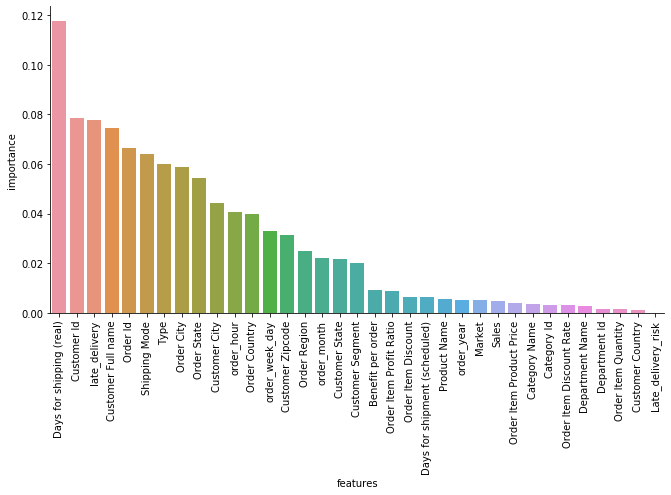

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

feat_importance = feat_importance.sort_values(by='importance',ascending=False)
sns.catplot(x='features',y='importance',data=feat_importance,kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)

In [160]:
# 神经网络进行分类
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
keras.layers.BatchNormalization()
classifier = Sequential()
# 第一层隐藏层
classifier.add(Dense(1024,activation='relu',kernel_initializer='random_normal',input_dim=35))
# 第二层隐藏层
classifier.add(Dense(512,activation='relu',kernel_initializer='random_normal'))
# 第3层隐藏层
classifier.add(Dense(256,activation='relu',kernel_initializer='random_normal'))
# 第4层隐藏层
classifier.add(Dense(128,activation='relu',kernel_initializer='random_normal'))
# 第5层隐藏层
classifier.add(Dense(64,activation='relu',kernel_initializer='random_normal'))
# 第6层隐藏层
classifier.add(Dense(32,activation='relu',kernel_initializer='random_normal'))
# 第7层隐藏层
classifier.add(Dense(16,activation='relu',kernel_initializer='random_normal'))
# 第8层隐藏层
classifier.add(Dense(8,activation='relu',kernel_initializer='random_normal'))
# 第9层隐藏层
classifier.add(Dense(4,activation='relu',kernel_initializer='random_normal'))
# 第10层隐藏层
classifier.add(Dense(2,activation='relu',kernel_initializer='random_normal'))
# 输出层
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
# 定义优化器，损失函数
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# 训练
classifier.fit(x_fraud_train,y_fraud_train,batch_size=512,epochs=10)


Epoch 1/10
283/283 [==============================] - 8s 28ms/step - loss: 0.6306 - accuracy: 0.9775
Epoch 2/10
283/283 [==============================] - 9s 30ms/step - loss: 0.5221 - accuracy: 0.9776
Epoch 3/10
283/283 [==============================] - 10s 36ms/step - loss: 0.4365 - accuracy: 0.9776
Epoch 4/10
283/283 [==============================] - 12s 42ms/step - loss: 0.3692 - accuracy: 0.9776
Epoch 5/10
283/283 [==============================] - 13s 46ms/step - loss: 0.3163 - accuracy: 0.9776
Epoch 6/10
283/283 [==============================] - 15s 53ms/step - loss: 0.2745 - accuracy: 0.9776
Epoch 7/10
283/283 [==============================] - 12s 41ms/step - loss: 0.2413 - accuracy: 0.9776
Epoch 8/10
283/283 [==============================] - 11s 40ms/step - loss: 0.2149 - accuracy: 0.9776
Epoch 9/10
283/283 [==============================] - 12s 44ms/step - loss: 0.1937 - accuracy: 0.9776
Epoch 10/10
283/283 [==============================] - 12s 42ms/step - loss: 0.1766 

In [161]:
train_evaluate = classifier.evaluate(x_fraud_train,y_fraud_train)
test_evaluate = classifier.evaluate(x_fraud_test,y_fraud_test)
print('训练集准确率：',train_evaluate)
print('测试集准确率：',test_evaluate)

1129/1129 [==============================] - 18s 16ms/step - loss: 0.1702 - accuracy: 0.9771
训练集准确率： [0.16913364827632904, 0.9775981903076172]
测试集准确率： [0.17015504837036133, 0.9770933389663696]


* 用同样的神经网络训练x_lat_train

In [162]:
classifier.fit(x_late_train,y_late_train,batch_size=512,epochs=10)


Epoch 1/10
283/283 [==============================] - 11s 38ms/step - loss: 1.1328 - accuracy: 0.4512
Epoch 2/10
283/283 [==============================] - 11s 39ms/step - loss: 0.9742 - accuracy: 0.4512
Epoch 3/10
283/283 [==============================] - 14s 51ms/step - loss: 0.8727 - accuracy: 0.4512
Epoch 4/10
283/283 [==============================] - 13s 47ms/step - loss: 0.8044 - accuracy: 0.4512
Epoch 5/10
283/283 [==============================] - 12s 43ms/step - loss: 0.7587 - accuracy: 0.4512
Epoch 6/10
283/283 [==============================] - 13s 47ms/step - loss: 0.7288 - accuracy: 0.4512
Epoch 7/10
283/283 [==============================] - 15s 53ms/step - loss: 0.7102 - accuracy: 0.4512
Epoch 8/10
283/283 [==============================] - 16s 55ms/step - loss: 0.6993 - accuracy: 0.4512
Epoch 9/10
283/283 [==============================] - 14s 48ms/step - loss: 0.6934 - accuracy: 0.4969
Epoch 10/10
283/283 [==============================] - 14s 48ms/step - loss: 0.690

In [163]:
lat_train_evaluate = classifier.evaluate(x_late_train,y_late_train)
lat_test_evaluate = classifier.evaluate(x_late_test,y_late_test)
print('训练集准确率：',lat_train_evaluate)
print('测试集准确率：',lat_test_evaluate)

1129/1129 [==============================] - 13s 11ms/step - loss: 0.6898 - accuracy: 0.5464
训练集准确率： [0.6896295547485352, 0.5487645864486694]
测试集准确率： [0.6898437142372131, 0.5464088916778564]


In [164]:
accuracy_list

{('Fraud', LogisticRegression()): 0.9782289560424341,
 ('Late Delivery', LogisticRegression()): 1.0,
 ('Fraud', LinearSVC()): 0.9779519707503531,
 ('Late Delivery', LinearSVC()): 1.0,
 ('Fraud', DecisionTreeClassifier()): 0.9864831177464477,
 ('Late Delivery', DecisionTreeClassifier()): 1.0,
 ('Fraud', LinearSVC()): 0.9780073678087694,
 ('Late Delivery', LinearSVC()): 1.0,
 ('Fraud', DecisionTreeClassifier()): 0.9866493089216962,
 ('Late Delivery', DecisionTreeClassifier()): 1.0}

In [165]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split ,cross_val_score

# 硬投票
eclf = VotingClassifier(estimators=[('LR',model_fraud_lr),('dt',model_fraud_dt)],voting='soft')
for clf,label in zip([model_fraud_lr,model_fraud_dt,eclf],['LR','dt','Voting']):
#     scores = cross_val_score(clf,x_fraud,y_fraud,cv=5,scoring='accuracy')
    scores = cross_val_score(clf,x_fraud,y_fraud,cv=5,scoring='f1')
    print('F1:%0.2f (+/-%0.2f) [%s]' %(scores.mean(),scores.std(),label))

/home/stu_15012480609/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/stu_15012480609/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

F1:0.00 (+/-0.00) [LR]
F1:0.55 (+/-0.16) [dt]


/home/stu_15012480609/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/stu_15012480609/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

F1:0.54 (+/-0.16) [Voting]


In [166]:
# KNN 模型
model_fraud = KNeighborsClassifier(n_neighbors= 1)
model_late = KNeighborsClassifier(n_neighbors= 1)

model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'Fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

Model Used: KNeighborsClassifier(n_neighbors=1)
Fraud Accuracy: 97.63177575270753%
Fraud Recall: 47.97687861271676%
Fraud AUC:73.28950394728918%
Fraud F1 Score: 43.71296905859118%
Fraud Confusion Matrix:
[[34916   495]
 [  360   332]]
Model Used: KNeighborsClassifier(n_neighbors=1)
Late Delivery Accuracy: 98.32423898291%
Late Delivery Recall: 98.34648058252428%
Late Delivery AUC:98.32188976758968%
Late Delivery F1 Score: 98.46847074905702%
Late Delivery Confusion Matrix:
[[16049   278]
 [  327 19449]]


KNeighborsClassifier(n_neighbors=1)

In [169]:
# LDA 模型
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_fraud = LinearDiscriminantAnalysis()
model_late = LinearDiscriminantAnalysis()

model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'Fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')


Model Used: LinearDiscriminantAnalysis()
Fraud Accuracy: 97.91984045647176%
Fraud Recall: 55.88235294117647%
Fraud AUC:77.28404247730059%
Fraud F1 Score: 49.01561439239647%
Fraud Confusion Matrix:
[[34991   466]
 [  285   361]]
Model Used: LinearDiscriminantAnalysis()
Late Delivery Accuracy: 100.0%
Late Delivery Recall: 100.0%
Late Delivery AUC:100.0%
Late Delivery F1 Score: 100.0%
Late Delivery Confusion Matrix:
[[16376     0]
 [    0 19727]]


LinearDiscriminantAnalysis()

In [170]:
# 随机森林模型
model_fraud = RandomForestClassifier()
model_late = RandomForestClassifier()

model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'Fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')


Model Used: RandomForestClassifier()
Fraud Accuracy: 98.80342353821013%
Fraud Recall: 94.98861047835992%
Fraud AUC:96.91949590764115%
Fraud F1 Score: 65.87677725118483%
Fraud Confusion Matrix:
[[35254   410]
 [   22   417]]
Model Used: RandomForestClassifier()
Late Delivery Accuracy: 100.0%
Late Delivery Recall: 100.0%
Late Delivery AUC:100.0%
Late Delivery F1 Score: 100.0%
Late Delivery Confusion Matrix:
[[16376     0]
 [    0 19727]]


RandomForestClassifier()

In [171]:
# XGBoost模型
import xgboost as xgb
model_fraud = xgb.XGBClassifier()
model_late = xgb.XGBClassifier()

model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'Fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

Model Used: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Fraud Accuracy: 98.71755809766502%
Fraud Recall: 89.39393939393939%
Fraud AUC:94.1161779122274%
Fraud F1 Score: 64.08068269976727%
Fraud Confusion Matrix:
[[35227   414]
 [   49   413]]
Model Used: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 1）对销售额进行预测，Sales字段
### 2）对订货数量进行预测，即Order Item Quantity

In [173]:


x_sales= train_data.loc[:,train_data.columns != 'Sales']
y_sales =train_data['Sales']

x_quantity= train_data.loc[:,train_data.columns != 'Order Item Quantity']
y_quantity =train_data['Order Item Quantity']



In [178]:
y_sales.value_counts()

129.990005    22372
399.980011    17325
199.990005    15622
299.980011    13729
179.970001     5016
              ...  
379.959992       10
999.989990       10
99.000000         9
198.000000        9
396.000000        9
Name: Sales, Length: 193, dtype: int64

In [188]:
y_sales

0         327.750000
1         327.750000
2         327.750000
3         327.750000
4         327.750000
             ...    
180514    399.980011
180515    399.980011
180516    399.980011
180517    399.980011
180518    399.980011
Name: Sales, Length: 180511, dtype: float64

In [179]:
# 数据切分
x_sales_train,x_sales_test,y_sales_train,y_sales_test = train_test_split(x_sales,y_sales,test_size=0.2)
x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test = train_test_split(x_quantity,y_quantity,test_size=0.2)


In [180]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# 回归模型，采用MSE MAE，RMSE 指标

def regression_model_stats(model,x_train,x_test,y_train,y_test,model_name='Sales'):
    model= model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    print('Model Userd:',model)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    print('{} MAE {}'.format(model_name,mae))
    print('{} MSE {}'.format(model_name,mse))
    return mae,mse

    

In [181]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_sales= LinearRegression()
model_quantity= LinearRegression()
# 模型评估
regression_model_stats(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'Order Item Quantity')


Model Userd: LinearRegression()
Sales MAE 18.445901764617258
Sales MSE 971.2652209232349
Model Userd: LinearRegression()
Order Item Quantity MAE 0.34720860251899205
Order Item Quantity MSE 0.28008884037551435


(0.34720860251899205, 0.28008884037551435)

In [182]:
# Ridge Regression
from sklearn.linear_model import Ridge

model_sales= Ridge()
model_quantity= Ridge()
# 模型评估
regression_model_stats(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'Order Item Quantity')

Model Userd: Ridge()
Sales MAE 18.44117608641002
Sales MSE 971.2539432868089
Model Userd: Ridge()
Order Item Quantity MAE 0.347204295427871
Order Item Quantity MSE 0.2800884502982298


(0.347204295427871, 0.2800884502982298)

In [183]:
# DecisionTreeRegressor
model_sales= DecisionTreeRegressor()
model_quantity= DecisionTreeRegressor()
# 模型评估
regression_model_stats(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'Order Item Quantity')

Model Userd: DecisionTreeRegressor()
Sales MAE 9.850152067204159e-12
Sales MSE 1.997848202858561e-22
Model Userd: DecisionTreeRegressor()
Order Item Quantity MAE 0.0
Order Item Quantity MSE 0.0


(0.0, 0.0)

In [184]:
# DecisionTreeRegressor
model_sales= xgb.XGBRegressor()
model_quantity= xgb.XGBRegressor()
# 模型评估
regression_model_stats(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'Order Item Quantity')

Model Userd: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Sales MAE 0.009632753331854815
Sales MSE 0.004335070392426146
Model Userd: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constr

(4.3414573380449384e-05, 3.382224139261112e-08)

In [185]:
import lightgbm as lgb
# DecisionTreeRegressor
model_sales= lgb.LGBMRegressor()
model_quantity= lgb.LGBMRegressor()
# 模型评估
regression_model_stats(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'Order Item Quantity')

Model Userd: LGBMRegressor()
Sales MAE 0.13371845220992792
Sales MSE 2.94302635172132
Model Userd: LGBMRegressor()
Order Item Quantity MAE 0.0003865000683266655
Order Item Quantity MSE 5.601122063453452e-06


(0.0003865000683266655, 5.601122063453452e-06)

In [186]:
# DecisionTreeRegressor
model_sales= RandomForestRegressor()
model_quantity= RandomForestRegressor()
# 模型评估
regression_model_stats(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'Order Item Quantity')

Model Userd: RandomForestRegressor()
Sales MAE 3.8176871793548066e-05
Sales MSE 3.992292222335942e-05
Model Userd: RandomForestRegressor()
Order Item Quantity MAE 0.0
Order Item Quantity MSE 0.0


(0.0, 0.0)

In [187]:
accuracy_list

{('Fraud', LogisticRegression()): 0.9782289560424341,
 ('Late Delivery', LogisticRegression()): 1.0,
 ('Fraud', LinearSVC()): 0.9779519707503531,
 ('Late Delivery', LinearSVC()): 1.0,
 ('Fraud', DecisionTreeClassifier()): 0.9864831177464477,
 ('Late Delivery', DecisionTreeClassifier()): 1.0,
 ('Fraud', LinearSVC()): 0.9780073678087694,
 ('Late Delivery', LinearSVC()): 1.0,
 ('Fraud', DecisionTreeClassifier()): 0.9866493089216962,
 ('Late Delivery', DecisionTreeClassifier()): 1.0,
 ('Fraud', KNeighborsClassifier(n_neighbors=1)): 0.9763177575270753,
 ('Late Delivery', KNeighborsClassifier(n_neighbors=1)): 0.9832423898291001,
 ('Fraud', LinearDiscriminantAnalysis()): 0.9791984045647176,
 ('Late Delivery', LinearDiscriminantAnalysis()): 1.0,
 ('Fraud', LinearDiscriminantAnalysis()): 0.9791984045647176,
 ('Late Delivery', LinearDiscriminantAnalysis()): 1.0,
 ('Fraud', RandomForestClassifier()): 0.9880342353821012,
 ('Late Delivery', RandomForestClassifier()): 1.0,
 ('Fraud',
  XGBClassifier